In [1]:
library(dplyr)
library(ggplot2)
library(cowplot)
library(qvalue)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


********************************************************
Note: As of version 1.0.0, cowplot does not change the
  default ggplot2 theme anymore. To recover the previous
  behavior, execute:
  theme_set(theme_cowplot())
********************************************************



In [2]:
revision_folder = "/hps/nobackup2/stegle/users/acuomo/all_scripts/struct_LMM2/sc_endodiff/debug_May2021/REVISION/"

In [3]:
crm_file = paste0(revision_folder, "Annas_results_all_common_eqtls.csv")
# crm_file = paste0(revision_folder,"Annas_results_all_common_eqtls_with_Bonferroni.csv")
crm = read.csv(crm_file, row.names=1)

In [4]:
crm_assoc = crm[crm$chrom %in% c(20,21,22),]

In [5]:
head(crm_assoc)

,gene,n_snps,chrom,pv_raw,snpID,pv,eqtl
7476,ENSG00000100206,639,22,0.4846768,22_38815543_G_T,1,ENSG00000100206-22_38815543_G_T
7477,ENSG00000100206,639,22,0.5735132,22_38815767_C_T,1,ENSG00000100206-22_38815767_C_T
7478,ENSG00000100206,639,22,0.8756466,22_38816059_T_C,1,ENSG00000100206-22_38816059_T_C
7479,ENSG00000100206,639,22,0.1460246,22_38816351_G_A,1,ENSG00000100206-22_38816351_G_A
7480,ENSG00000100206,639,22,0.2546127,22_38817047_A_G,1,ENSG00000100206-22_38817047_A_G
7481,ENSG00000100206,639,22,0.1834585,22_38817105_C_T,1,ENSG00000100206-22_38817105_C_T


In [6]:
# crm_assoc$fdr = p.adjust(crm_assoc$pv_raw, method = "BH")

In [7]:
res_dir = "/hps/nobackup2/stegle/users/acuomo/all_scripts/struct_LMM2/sc_endodiff/debug_May2021/REVISION/CRM_interaction_chr22/results/"
all_files = list.files(res_dir)
length(all_files)

[1] 31452

In [8]:
correct_files = list.files(res_dir,"*0.tsv")
length(correct_files)

[1] 31451

In [9]:
all_files[!(all_files %in% correct_files)]

[1] "summary.csv"

In [63]:
crm_int_file = paste0(revision_folder, "CRM_interaction_chr22/results/summary.csv")
crm_int = read.csv(crm_int_file, row.names=1)
nrow(crm_int)
head(crm_int,2)

[1] 334861

,gene,n_snps,chrom,pv_raw,snpID
0,ENSG00000250479,10,22,0.3439653,22_24071877_G_A
1,ENSG00000250479,10,22,0.4098352,22_24072256_G_C


In [64]:
crm_int_file

[1] "/hps/nobackup2/stegle/users/acuomo/all_scripts/struct_LMM2/sc_endodiff/debug_May2021/REVISION/CRM_interaction_chr22/results/summary.csv"

In [65]:
unique(as.character(crm_int$chrom))

[1] "22" "20" "21"

In [66]:
# unique(as.character(crm_int[crm_int$chrom == 20, ]$gene))
length(unique(as.character(crm_int[crm_int$chrom == 20, ]$gene)))
length(unique(as.character(crm_int[crm_int$chrom == 21, ]$gene)))
length(unique(as.character(crm_int[crm_int$chrom == 22, ]$gene)))

[1] 263

[1] 93

[1] 271

In [67]:
length(unique(as.character(crm_int$gene)))

[1] 627

In [68]:
crm_int$fdr = p.adjust(crm_int$pv_raw, method = "BH")

In [69]:
df_join = inner_join(crm_assoc, crm_int, by=c("snpID","gene"), suffix=c(".assoc",".int"))
df_join$fdr_assoc = p.adjust(df_join$pv_raw.assoc, method = "BH")

In [70]:
nrow(df_join)

[1] 334861

In [71]:
cor.test(-log10(df_join$pv_raw.assoc),-log10(df_join$pv_raw.int))


	Pearson's product-moment correlation

data:  -log10(df_join$pv_raw.assoc) and -log10(df_join$pv_raw.int)
t = 198.08, df = 334859, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.3208141 0.3268777
sample estimates:
      cor 
0.3238492 


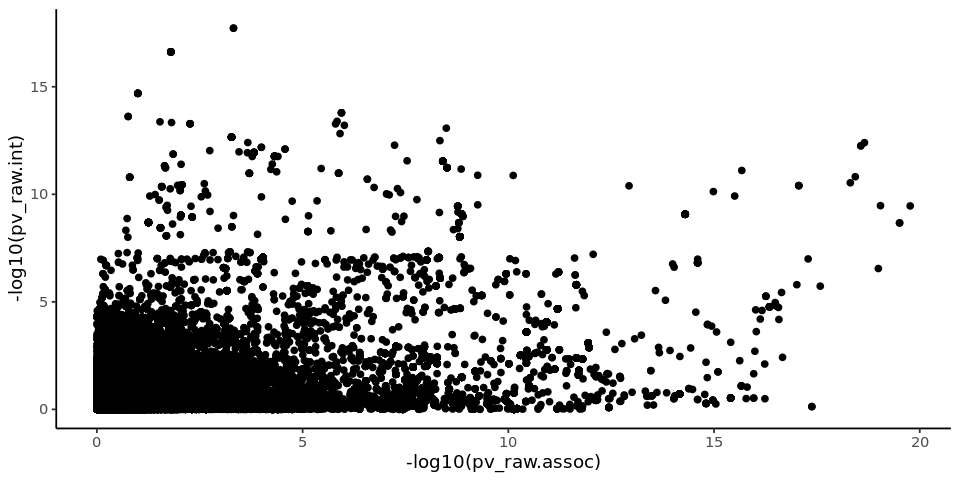

In [72]:
p = ggplot(df_join, aes(x=-log10(pv_raw.assoc),y=-log10(pv_raw.int))) + geom_point()
p + theme_classic()

In [25]:
df_all = df_join
nrow(df_all)

[1] 311760

In [26]:
head(df_all)

gene,n_snps.assoc,chrom.assoc,pv_raw.assoc,snpID,pv,eqtl,n_snps.int,chrom.int,pv_raw.int,fdr,fdr_assoc
ENSG00000100206,639,22,0.4846768,22_38815543_G_T,1,ENSG00000100206-22_38815543_G_T,10,22,0.6147924,0.9999802,0.8622448
ENSG00000100206,639,22,0.5735132,22_38815767_C_T,1,ENSG00000100206-22_38815767_C_T,10,22,0.6793908,0.9999802,0.8959186
ENSG00000100206,639,22,0.8756466,22_38816059_T_C,1,ENSG00000100206-22_38816059_T_C,10,22,0.6799526,0.9999802,0.9811730
ENSG00000100206,639,22,0.1460246,22_38816351_G_A,1,ENSG00000100206-22_38816351_G_A,10,22,0.4727467,0.9999802,0.6001068
ENSG00000100206,639,22,0.2546127,22_38817047_A_G,1,ENSG00000100206-22_38817047_A_G,10,22,0.9916579,0.9999802,0.7254312
ENSG00000100206,639,22,0.1834585,22_38817105_C_T,1,ENSG00000100206-22_38817105_C_T,10,22,0.9288681,0.9999802,0.6470909


In [27]:
df_gene = data.frame(gene = unique(df_all$gene), cor=0)
head(df_gene,2)
nrow(df_gene)

gene,cor
ENSG00000100206,0
ENSG00000170373,0


[1] 584

In [28]:
for (gene in unique(df_all$gene)){
    df_cur = df_all[df_all$gene == gene,]
    df_gene[df_gene$gene == gene,"cor"] = cor(-log10(df_cur$pv_raw.assoc),-log10(df_cur$pv_raw.int))
}
head(df_gene,2)
nrow(df_gene)

gene,cor
ENSG00000100206,0.006254721
ENSG00000170373,0.646885950


[1] 584

In [29]:
df_join = df_all[df_all$gene %in% df_gene[df_gene$cor>0,"gene"],]

In [30]:
length(df_gene[df_gene$cor>0,"gene"])

[1] 364

In [31]:
nrow(df_join)

[1] 199963

In [32]:
df_join$fdr_assoc = p.adjust(df_join$pv_raw.assoc, method = "BH")

In [33]:
thresholds = seq(0, 1, length.out = 100)

In [34]:
df_plot = data.frame(assoc_FDR = thresholds, n_GxC=0, n_eGenes=0)

In [106]:
# FDR < 20%
for (t in thresholds){
    res = df_join[df_join$fdr_assoc < t,]
    res$fdr = p.adjust(res$pv_raw.int, method = "BH")
    df_plot[df_plot$assoc_FDR == t,"n_GxC"] = nrow(res[res$fdr < 0.2,])
    df_plot[df_plot$assoc_FDR == t,"n_eGenes"] = length(unique(res[res$fdr < 0.2,"gene"]))
}

In [107]:
head(df_plot)

assoc_FDR,n_GxC,n_eGenes
0.00000000,0,0
0.01010101,1653,35
0.02020202,2244,43
0.03030303,2540,48
0.04040404,2768,50
0.05050505,2962,53


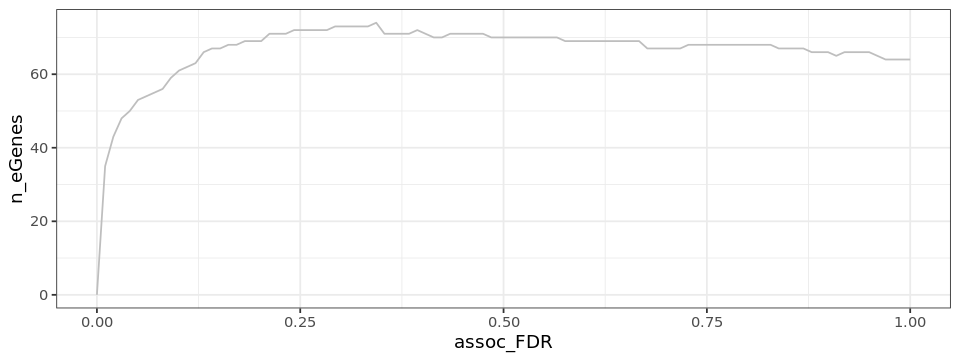

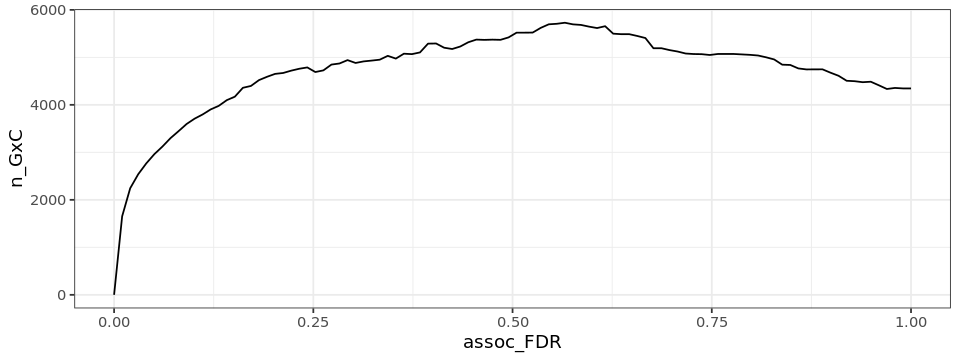

In [108]:
options(repr.plot.width = 8, repr.plot.height = 3) 
ggplot(df_plot, aes(x = assoc_FDR, y = n_eGenes)) + geom_line(col="grey") + theme_bw()
ggplot(df_plot, aes(x = assoc_FDR, y = n_GxC)) + geom_line() + theme_bw()

In [109]:
df_plot = data.frame(assoc_FDR = thresholds, n_GxC=0, n_eGenes=0)
# FDR < 10%
for (t in thresholds){
    res = df_join[df_join$fdr_assoc < t,]
    res$fdr = p.adjust(res$pv_raw.int, method = "BH")
    df_plot[df_plot$assoc_FDR == t,"n_GxC"] = nrow(res[res$fdr < 0.1,])
    df_plot[df_plot$assoc_FDR == t,"n_eGenes"] = length(unique(res[res$fdr < 0.1,"gene"]))
}

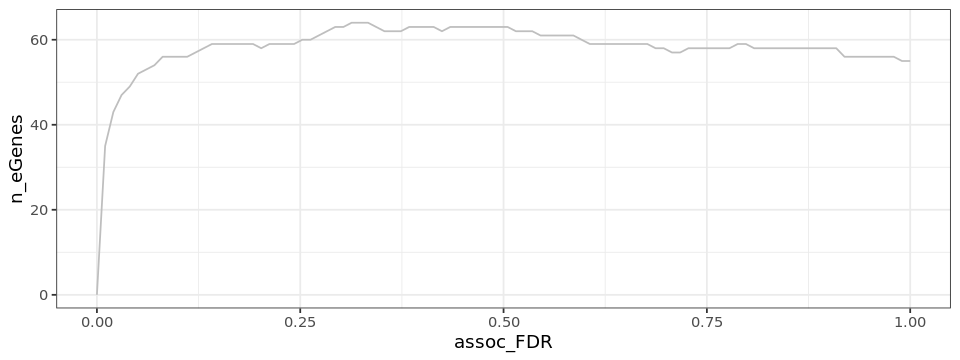

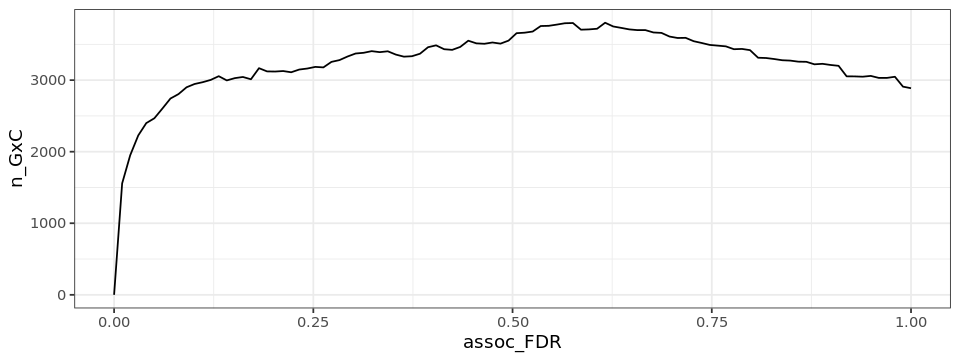

In [110]:
options(repr.plot.width = 8, repr.plot.height = 3) 
ggplot(df_plot, aes(x = assoc_FDR, y = n_eGenes)) + geom_line(col="grey") + theme_bw()
ggplot(df_plot, aes(x = assoc_FDR, y = n_GxC)) + geom_line() + theme_bw()

In [111]:
# FDR < 5%
df_plot = data.frame(assoc_FDR = thresholds, n_GxC=0, n_eGenes=0)
for (t in thresholds){
    res = df_join[df_join$fdr_assoc < t,]
    res$fdr = p.adjust(res$pv_raw.int, method = "BH")
    df_plot[df_plot$assoc_FDR == t,"n_GxC"] = nrow(res[res$fdr < 0.05,])
    df_plot[df_plot$assoc_FDR == t,"n_eGenes"] = length(unique(res[res$fdr < 0.05,"gene"]))
}

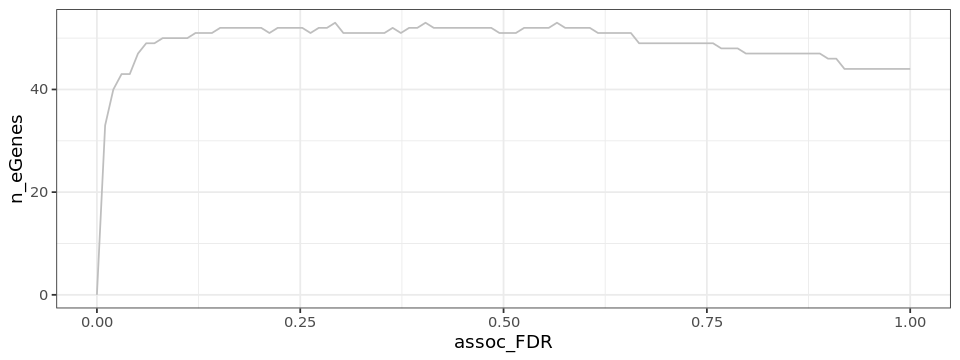

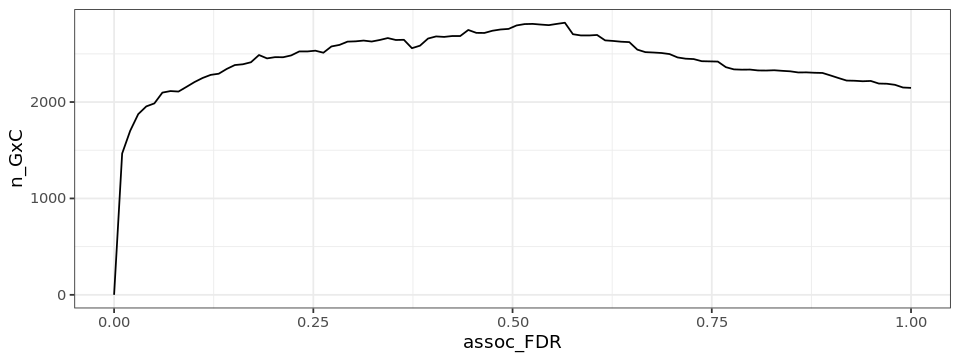

In [112]:
options(repr.plot.width = 8, repr.plot.height = 3) 
ggplot(df_plot, aes(x = assoc_FDR, y = n_eGenes)) + geom_line(col="grey") + theme_bw()
ggplot(df_plot, aes(x = assoc_FDR, y = n_GxC)) + geom_line() + theme_bw()

In [113]:
df_plot = data.frame(assoc_FDR = thresholds, n_GxC=0, n_eGenes=0)
# FDR < 1%
for (t in thresholds){
    res = df_join[df_join$fdr_assoc < t,]
    nrow(res)
    res$fdr = p.adjust(res$pv_raw.int, method = "BH")
    df_plot[df_plot$assoc_FDR == t,"n_GxC"] = nrow(res[res$fdr < 0.01,])
    df_plot[df_plot$assoc_FDR == t,"n_eGenes"] = length(unique(res[res$fdr < 0.01,"gene"]))
}

In [ ]:
# other y axis: how many variants tested
# lead variants only

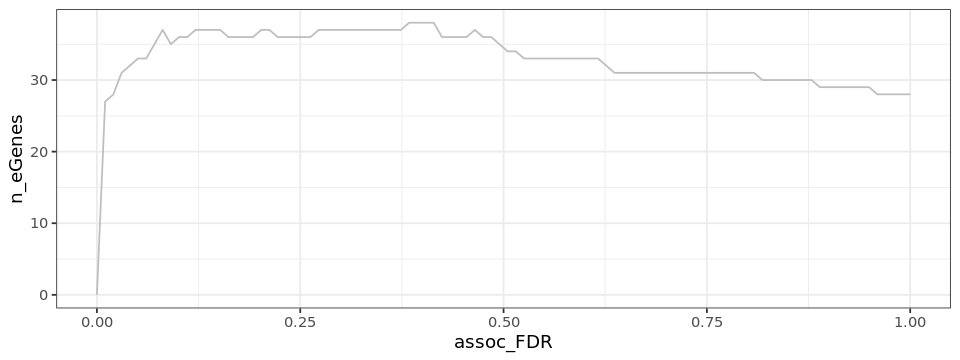

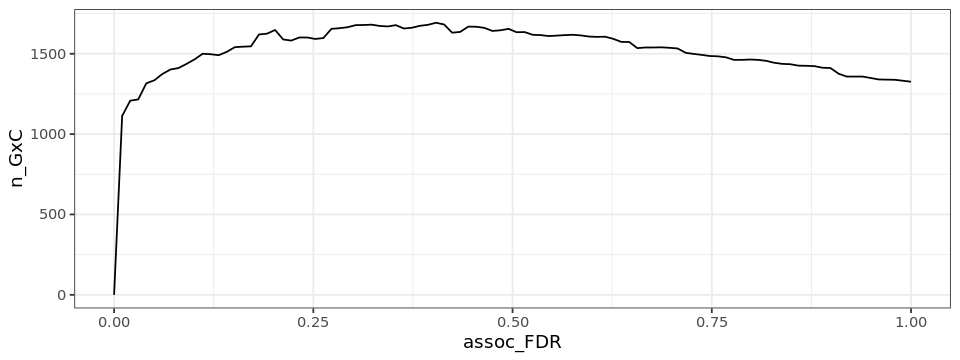

In [114]:
options(repr.plot.width = 8, repr.plot.height = 3) 
ggplot(df_plot, aes(x = assoc_FDR, y = n_eGenes)) + geom_line(col="grey") + theme_bw()
ggplot(df_plot, aes(x = assoc_FDR, y = n_GxC)) + geom_line() + theme_bw()

In [240]:
df_plot = data.frame(assoc_FDR = thresholds, n_GxC=0, n_eGenes=0)
# FDR < 0.1%
for (t in thresholds){
    res = df_join[df_join$fdr_assoc < t,]
    nrow(res)
    res$fdr = p.adjust(res$pv_raw.int, method = "bonferroni")
    df_plot[df_plot$assoc_FDR == t,"n"] = nrow(res)
    df_plot[df_plot$assoc_FDR == t,"n_GxC"] = nrow(res[res$fdr < 0.01,])
    df_plot[df_plot$assoc_FDR == t,"n_eGenes"] = length(unique(res[res$fdr < 0.01,"gene"]))
}

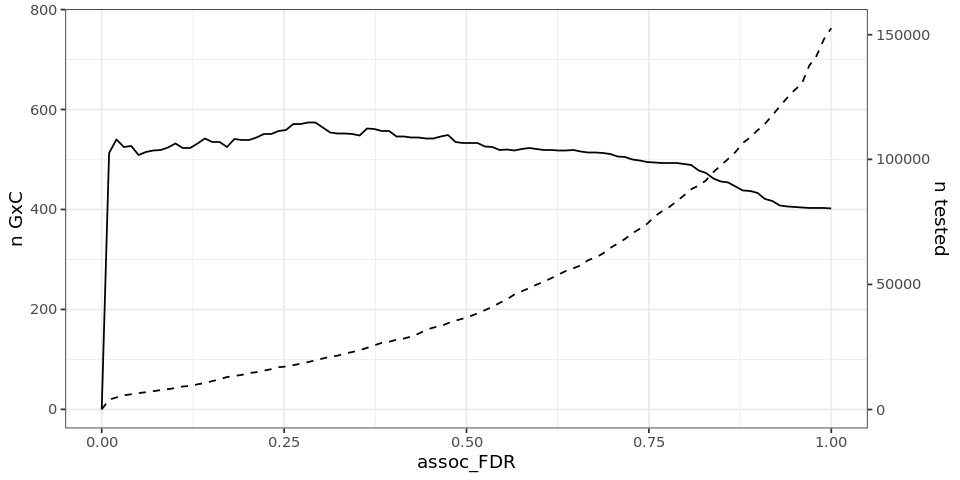

In [241]:
coeff <- 200
options(repr.plot.width = 8, repr.plot.height = 4)
ggplot(df_plot, aes(x=assoc_FDR)) + theme_bw() +
  
  geom_line( aes(y=n_GxC)) + 
  geom_line( aes(y=n / coeff), linetype="dashed") + # Divide by 100 to get the same range than the temperature
  
  scale_y_continuous(
    
    # Features of the first axis
    name = "n GxC",
    
    # Add a second axis and specify its features
    sec.axis = sec_axis(~.*coeff, name="n tested")
  )

In [53]:
df_plot = data.frame(assoc_FDR = thresholds, n_GxC=0, n_eGenes=0)
# FDR < 0.1%
for (t in thresholds){
    res1 = df_join[df_join$fdr_assoc < t,]
    res = res1[order(res1$fdr_assoc),]
#     res = res[-which(duplicated(res$gene)),]
    nrow(res)
    res$fdr = p.adjust(res$pv_raw.int, method = "bonferroni")
    df_plot[df_plot$assoc_FDR == t,"n"] = nrow(res)
    df_plot[df_plot$assoc_FDR == t,"n_GxC"] = nrow(res[res$fdr < 0.01,])
    df_plot[df_plot$assoc_FDR == t,"n_eGenes"] = length(unique(res[res$fdr < 0.01,"gene"]))
}

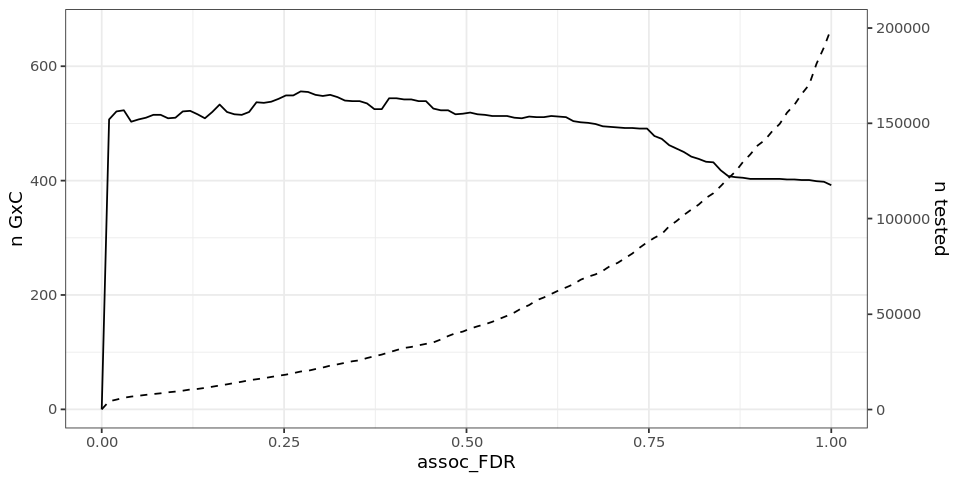

In [55]:
coeff <- 300
options(repr.plot.width = 8, repr.plot.height = 4)
ggplot(df_plot, aes(x=assoc_FDR)) + theme_bw() +
  
  geom_line( aes(y=n_GxC)) + 
  geom_line( aes(y=n / coeff), linetype="dashed") + # Divide by 100 to get the same range than the temperature
  
  scale_y_continuous(
    
    # Features of the first axis
    name = "n GxC",
    
    # Add a second axis and specify its features
    sec.axis = sec_axis(~.*coeff, name="n tested")
  )

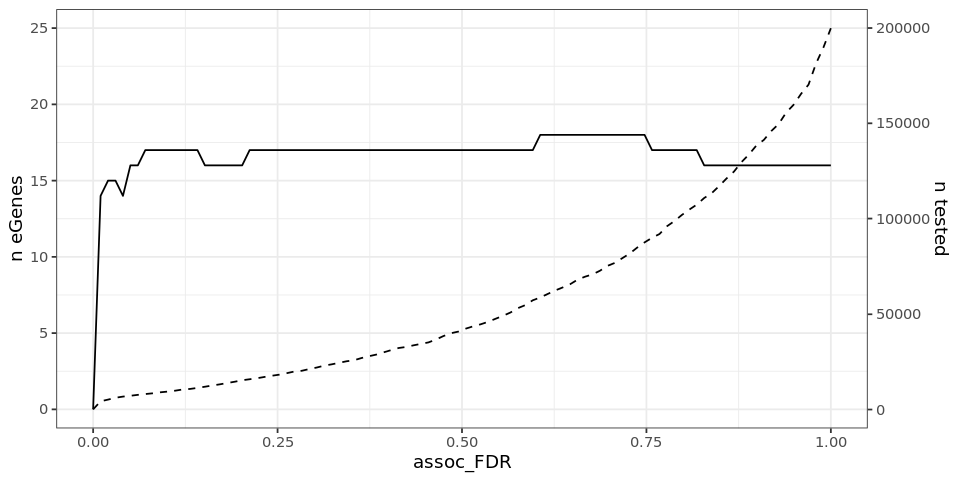

In [62]:
coeff <- 8000
options(repr.plot.width = 8, repr.plot.height = 4)
ggplot(df_plot, aes(x=assoc_FDR)) + theme_bw() +
  
  geom_line( aes(y=n_eGenes)) + 
  geom_line( aes(y=n / coeff), linetype="dashed") + # Divide by 100 to get the same range than the temperature
  
  scale_y_continuous(
    
    # Features of the first axis
    name = "n eGenes",
    
    # Add a second axis and specify its features
    sec.axis = sec_axis(~.*coeff, name="n tested")
  )

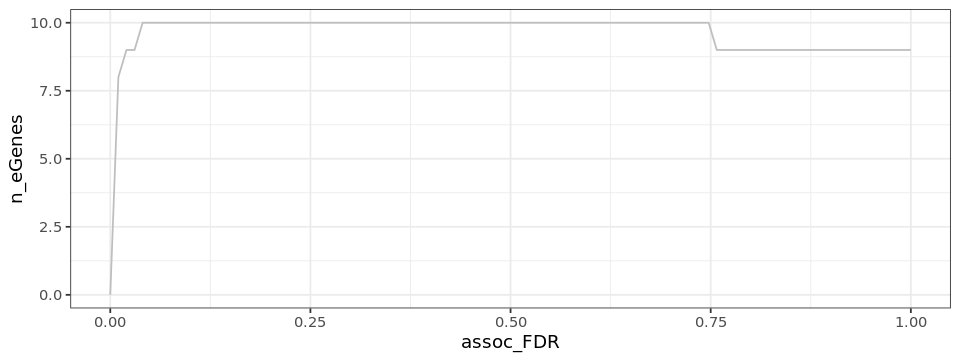

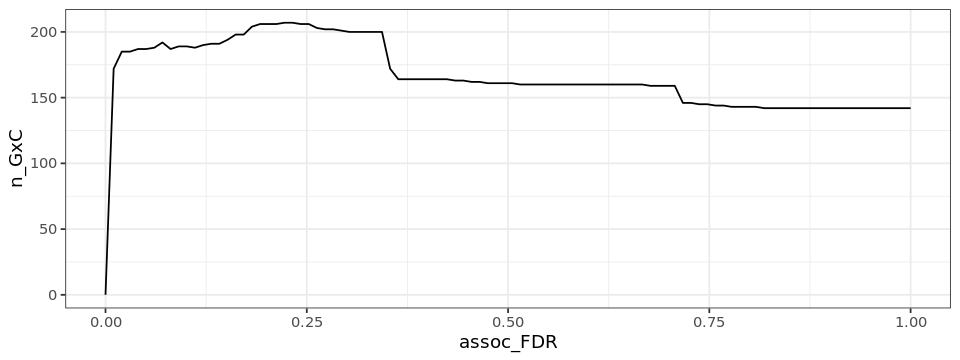

In [127]:
options(repr.plot.width = 8, repr.plot.height = 3) 
ggplot(df_plot, aes(x = assoc_FDR, y = n_eGenes)) + geom_line(col="grey") + theme_bw()
ggplot(df_plot, aes(x = assoc_FDR, y = n_GxC)) + geom_line() + theme_bw()